In [451]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# データ準備

In [452]:
a = np.array([
    [0.053, 0.020, 0.010, 0.0, 0.0],
    [0.030, 0.050, 0.030, 0.050, 0.012],
    [0.0, 0.020, 0.200, 0.040, 0.0],
    [0.060, 0.070, 0.030, 0.0, 0.0],
    [0.020, 0.005, 0.049, 0.02, 0.0],
    [0.025, 0.045, 0.0175, 0.0, 0.0]
])
a.shape

(6, 5)

In [453]:
y = np.array([18, 17, 18, 0.1, 0.5])
# 18, 17, 18, 0.1, 30
y.shape


(5,)

# 単位ベクトル化

In [454]:
def unit_vector(v):
    return v / np.linalg.norm(v, ord=2)

In [455]:

a_units = np.array([unit_vector(ai) for ai in a])
a_units


array([[0.92135604, 0.34768152, 0.17384076, 0.        , 0.        ],
       [0.36001152, 0.6000192 , 0.36001152, 0.6000192 , 0.14400461],
       [0.        , 0.09759001, 0.97590007, 0.19518001, 0.        ],
       [0.61885275, 0.72199487, 0.30942637, 0.        , 0.        ],
       [0.35212577, 0.08803144, 0.86270815, 0.35212577, 0.        ],
       [0.45980049, 0.82764088, 0.32186034, 0.        , 0.        ]])

In [456]:
y_unit = unit_vector(y)
y_unit

array([0.5879528 , 0.55528876, 0.5879528 , 0.0032664 , 0.01633202])

# 学習

In [457]:

p = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
a_units_t = a_units.T
a_units_dot_y_unit = np.dot(y_unit, a_units.T)

def check_neighbor(i, p_diff):
    tmp_p = p.copy()
    tmp_p[i] += p_diff
    unit_p = tmp_p / sum(tmp_p)
    cos_similarity = np.dot(a_units_dot_y_unit, unit_p)
    
    return cos_similarity

def train(alpha, beta):
    res = []
    for i in range(len(p)):
        p[i] = 0.5
        
    for i in range(len(p)):
        prev_cos_similarity = check_neighbor(i, 0.0)
        p_diff = 0.5

        for j in range(500):
            tmp_p_diff = (1.0 / (beta * j + 1.0)) * alpha * p_diff
            if check_neighbor(i, tmp_p_diff) > prev_cos_similarity:
                p[i] += tmp_p_diff
            elif check_neighbor(i, -tmp_p_diff) > prev_cos_similarity:
                p[i] -= tmp_p_diff

            p_diff = tmp_p_diff
            prev_cos_similarity = check_neighbor(i, p_diff)

        res.append(check_neighbor(0, 0))
    return res

alpha_list = np.arange(0.1, 1.0, 0.1)
beta_list = [1.0, 10.0, 100.0, 1000.0]
similarity_list = [[train(alpha, beta) for alpha in alpha_list] for beta in beta_list]


## どのalpha, betaが最適か？

/Users/tomoyaf/.pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


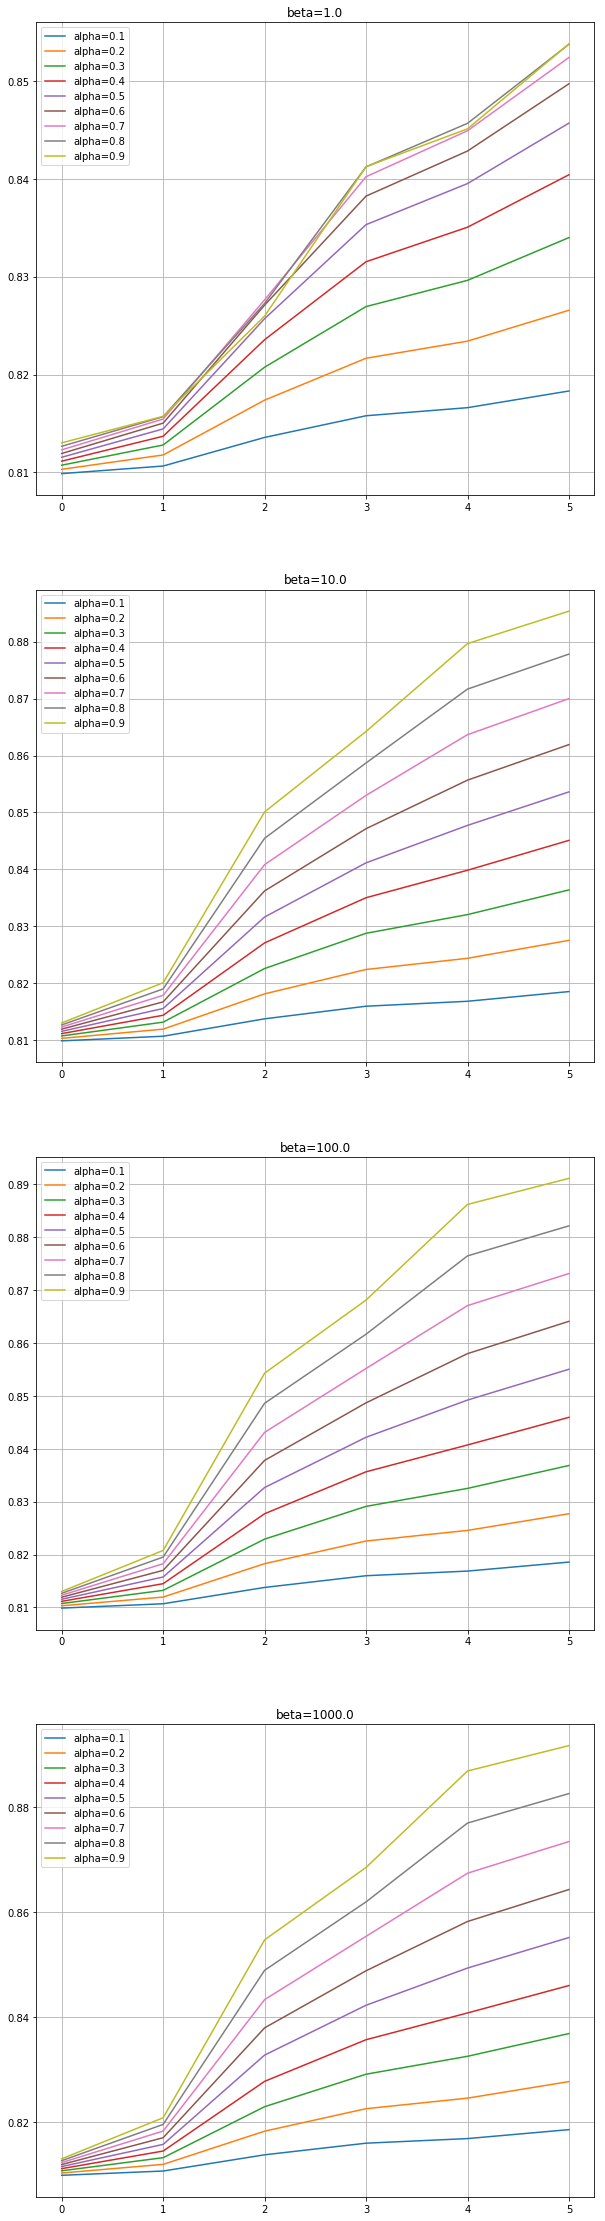

In [458]:
fig = plt.figure(figsize=(10,40))

for i in range(len(beta_list)):
    ax = fig.add_subplot(len(beta_list), 1, i + 1)
    
    for j in range(len(alpha_list)):
        ax.plot(similarity_list[i][j], label='alpha={:.1f}'.format(alpha_list[j]))
    ax.legend()
    ax.grid(which='both')
    ax.set_title('beta={:.1f}'.format(beta_list[i]))

fig.show()

# for sim, alpha in zip(similarity_list, alpha_list):
#     plt.plot(sim, label='alpha={:.1f}'.format(alpha))
# plt.legend()


Text(0, 0.5, 'cos similarity')

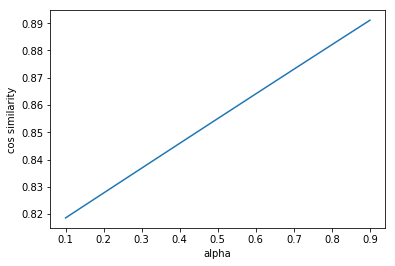

In [459]:

plt.plot(alpha_list, [s[-1:][0] for s in similarity_list[2]])
plt.xlabel('alpha')
plt.ylabel('cos similarity')


# alpha=0.9, beta=100.0が最適とわかったので実行

In [460]:
train(0.9, 100.0)

[0.8130261664784465,
 0.8207743243384851,
 0.8542760649143083,
 0.8681025190666394,
 0.8861713629760793,
 0.8910997104218548]

# 実際の肥料の重量を計算

In [461]:

v = np.dot(a.T, p)
ratio = y[0] / v[0]
v *= ratio
v

array([18.        , 17.79830225,  9.37642061,  0.79950781,  0.08721903])

In [462]:
y

array([18. , 17. , 18. ,  0.1,  0.5])

In [463]:
p * ratio

array([127.80135767,   7.26825284,   7.26825284, 127.80135767,
         7.26825284, 127.80135767])